In [103]:
import xarray as xar
import matplotlib.pyplot as plt
import numpy as np

#define some variables related to the experiment we're interested in

var_name = 'ua' #begin with zonal wind, ua
table_id='Amon'

version_name='latest'
grid_type = 'gn' #gn is model native grid

#define model dependent variables

#example 1 - HadGEM3-GC31-LL
model_centre_code = 'MOHC'
model_name = 'HadGEM3-GC31-LL'
experiment = 'piControl'
variant_label = 'r1i1p1f1'

start_year_file = 1850
start_month_file = '01'

end_year_file   = 1949
end_month_file  = '12'

#example 2 - UKESM1-0-LL

# model_centre_code = 'MOHC'
# model_name = 'UKESM1-0-LL'
# experiment = 'piControl'
# variant_label = 'r1i1p1f2'

# start_year_file = 1960
# start_month_file = '01'

# end_year_file   = 2049
# end_month_file  = '12'

start_time=f'{start_year_file}{start_month_file}' #January 1850 = 185001
end_time=f'{end_year_file}{end_month_file}'  #December 1949 = 194912

plev_for_analysis = 10000. #must be in Pascal

#construct corresponding directory on Jasmin
directory = f'/badc/cmip6/data/CMIP6/CMIP/{model_centre_code}/{model_name}/{experiment}/{variant_label}/{table_id}/{var_name}/{grid_type}/{version_name}/'
filename = f'{var_name}_{table_id}_{model_name}_{experiment}_{variant_label}_{grid_type}_{start_time}-{end_time}.nc'

#create xarray dataset using constructed filename
dataset = xar.open_dataset(f'{directory}/{filename}')

#resample for 2 years just to be quick
dataset_sub = dataset.sel(time=slice(str(start_year_file), str(start_year_file+2)))

#calculate monthly means
var_mean = dataset_sub[var_name].groupby('time.month').mean('time')

#select DJFM
var_winter_mean = var_mean.where(np.logical_or(var_mean.month<=3, var_mean.month==12), drop=True)
var_winter_mean_plev = var_winter_mean.sel(plev=plev_for_analysis, method='nearest')

/opt/jaspy/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


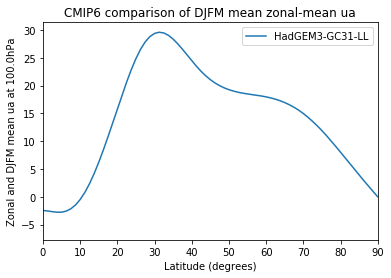

In [104]:
#Now take the zonal and mean over DJFM, and plot the result with a legend

var_winter_mean_plev.mean(('month', 'lon')).plot.line(label=model_name)

plt.xlim(0., 90.)
plt.ylabel(f'Zonal and DJFM mean {var_name} at {plev_for_analysis/100.}hPa')
plt.xlabel('Latitude (degrees)')
plt.title(f'CMIP6 comparison of DJFM mean zonal-mean {var_name}')
plt.legend()